Model Accuracy: 1.00
Confusion Matrix:
 [[3 0 0]
 [0 1 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

         Bus       1.00      1.00      1.00         3
      Flight       1.00      1.00      1.00         1
       Train       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



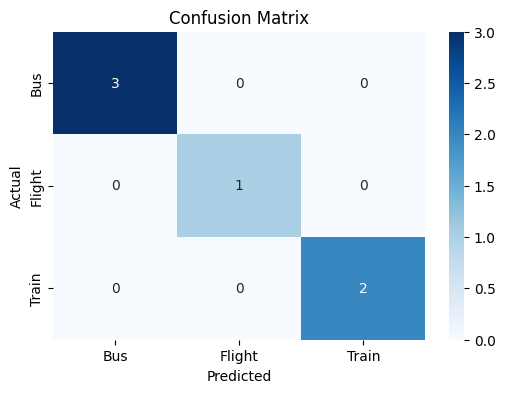

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = """Traveller,Budget,Mode
1,Cheap,Train
2,Cheap,Train
3,Cheap,Train
4,Cheap,Train
5,Cheap,Train
1,Moderate,Bus
2,Moderate,Bus
3,Moderate,Bus
4,Moderate,Bus
5,Moderate,Bus
1,Luxury,Flight
2,Luxury,Flight
3,Luxury,Flight
4,Luxury,Flight
5,Luxury,Flight
1,Cheap,Train
2,Cheap,Train
3,Cheap,Train
4,Cheap,Train
5,Cheap,Train
1,Moderate,Bus
2,Moderate,Bus
3,Moderate,Bus
4,Moderate,Bus
5,Moderate,Bus
1,Luxury,Flight
2,Luxury,Flight
3,Luxury,Flight
4,Luxury,Flight
5,Luxury,Flight"""

# Convert dataset to DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Encode categorical features
budget_encoder = LabelEncoder()
mode_encoder = LabelEncoder()

df["BudgetEncoded"] = budget_encoder.fit_transform(df["Budget"])
df["ModeEncoded"] = mode_encoder.fit_transform(df["Mode"])

# Prepare training data
X = df[["Traveller", "BudgetEncoded"]].values
y = df["ModeEncoded"].values

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=mode_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=mode_encoder.classes_, yticklabels=mode_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
